## Concrete Compressive Strength Regression Analysis
# 
 In this notebook, we will explore the differences between linear and polynomial regression on the Concrete Compressive Strength Dataset. We will:
# 
 - Load and preprocess the data
- Train and evaluate a linear regression model
- Train and evaluate polynomial regression models (degrees 2, 3, and 4)
- Visualize and compare the results
- Discuss the bias-variance tradeoff observed in these models

## (a) Data Loading & Preprocessing

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, r2_score

In [3]:
url = "http://archive.ics.uci.edu/ml/machine-learning-databases/concrete/compressive/Concrete_Data.xls"
df = pd.read_excel(url)

print("Dataset Head:")
print(df.head())

print("\nColumn Names:")
print(df.columns.tolist())

# Check for missing values
print("\nMissing Values per Column:")
print(df.isnull().sum())

X = df.iloc[:, :-1]
y = df.iloc[:, -1]

# Split the dataset into 80% training and 20% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("\nTraining set size:", X_train.shape)
print("Testing set size:", X_test.shape)

Dataset Head:
   Cement (component 1)(kg in a m^3 mixture)  \
0                                      540.0   
1                                      540.0   
2                                      332.5   
3                                      332.5   
4                                      198.6   

   Blast Furnace Slag (component 2)(kg in a m^3 mixture)  \
0                                                0.0       
1                                                0.0       
2                                              142.5       
3                                              142.5       
4                                              132.4       

   Fly Ash (component 3)(kg in a m^3 mixture)  \
0                                         0.0   
1                                         0.0   
2                                         0.0   
3                                         0.0   
4                                         0.0   

   Water  (component 4)(kg in a m^3 mixtu

## (b) Implementing Linear Regression

Linear Regression Performance:
Mean Squared Error (MSE): 95.97548435337706
Coefficient of Determination (R²): 0.6275416055429021


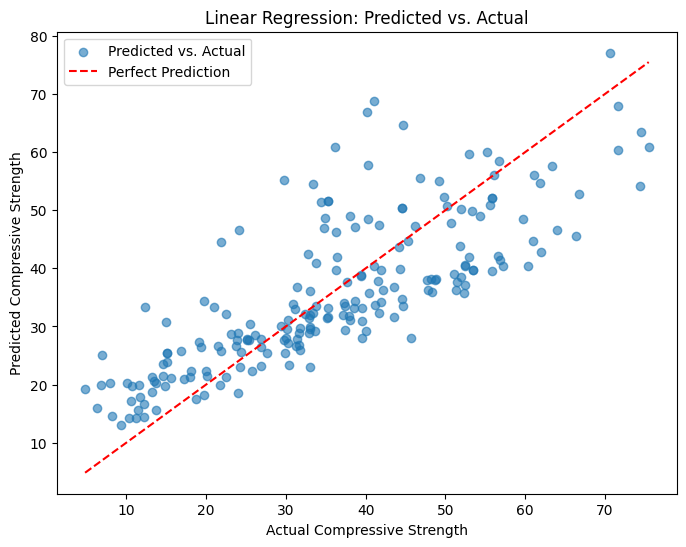

In [4]:
# Create and train the linear regression model
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

# Make predictions on the test set
y_pred_lin = lin_reg.predict(X_test)

# Evaluate performance
mse_lin = mean_squared_error(y_test, y_pred_lin)
r2_lin = r2_score(y_test, y_pred_lin)

print("Linear Regression Performance:")
print("Mean Squared Error (MSE):", mse_lin)
print("Coefficient of Determination (R²):", r2_lin)

# Plot predicted vs. actual values for linear regression
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_lin, alpha=0.6, label="Predicted vs. Actual")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', label="Perfect Prediction")
plt.xlabel("Actual Compressive Strength")
plt.ylabel("Predicted Compressive Strength")
plt.title("Linear Regression: Predicted vs. Actual")
plt.legend()
plt.show()

## (c) Implementing Polynomial Regression (Degrees 2, 3, 4)


Polynomial Degree 2 Performance:
Mean Squared Error (MSE): 55.58992637462134
Coefficient of Determination (R²): 0.7842685049731535

Polynomial Degree 3 Performance:
Mean Squared Error (MSE): 40.27116988534559
Coefficient of Determination (R²): 0.8437170139910102

Polynomial Degree 4 Performance:
Mean Squared Error (MSE): 677.3611923087616
Coefficient of Determination (R²): -1.6286802703276977



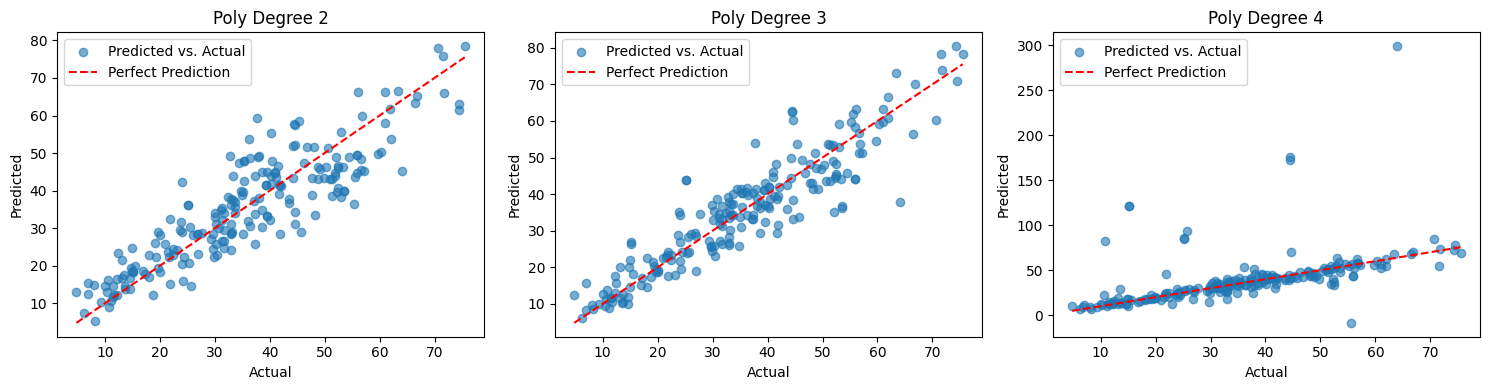

In [5]:
# Define the degrees we want to test
degrees = [2, 3, 4]

# Dictionaries to store performance metrics and predictions for each polynomial degree
mse_poly = {}
r2_poly = {}
y_pred_poly = {}

plt.figure(figsize=(15, 4))

for i, degree in enumerate(degrees):
    # Transform the features for the current polynomial degree
    poly = PolynomialFeatures(degree=degree, include_bias=False)
    X_train_poly = poly.fit_transform(X_train)
    X_test_poly = poly.transform(X_test)
    
    # Train the model on the polynomial features
    poly_reg = LinearRegression()
    poly_reg.fit(X_train_poly, y_train)
    
    # Predict on the test set
    y_pred = poly_reg.predict(X_test_poly)
    y_pred_poly[degree] = y_pred
    
    # Evaluate performance
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    mse_poly[degree] = mse
    r2_poly[degree] = r2
    
    print(f"Polynomial Degree {degree} Performance:")
    print(f"Mean Squared Error (MSE): {mse}")
    print(f"Coefficient of Determination (R²): {r2}\n")
    
    # Plot predicted vs. actual values for current polynomial degree
    plt.subplot(1, len(degrees), i+1)
    plt.scatter(y_test, y_pred, alpha=0.6, label="Predicted vs. Actual")
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', label="Perfect Prediction")
    plt.xlabel("Actual")
    plt.ylabel("Predicted")
    plt.title(f"Poly Degree {degree}")
    plt.legend()

plt.tight_layout()
plt.show()

## (d) Visualizing & Comparing Results

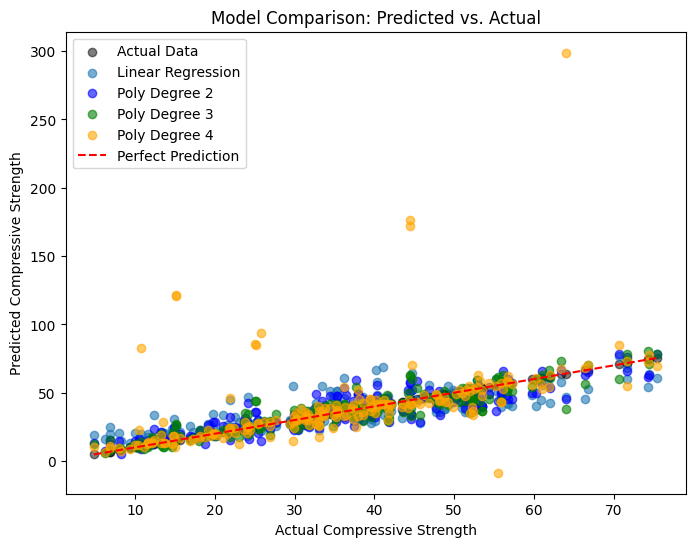

Performance Summary:
Linear Regression -> MSE: 95.9755, R²: 0.6275
Polynomial Degree 2 -> MSE: 55.5899, R²: 0.7843
Polynomial Degree 3 -> MSE: 40.2712, R²: 0.8437
Polynomial Degree 4 -> MSE: 677.3612, R²: -1.6287


In [6]:
# Create a combined plot for comparison
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_test, color="black", alpha=0.5, label="Actual Data")  # This shows the perfect prediction line

# Plot linear regression predictions
plt.scatter(y_test, y_pred_lin, alpha=0.6, label="Linear Regression")

# Plot polynomial regression predictions for each degree
colors = {2: "blue", 3: "green", 4: "orange"}
for degree in degrees:
    plt.scatter(y_test, y_pred_poly[degree], alpha=0.6, label=f"Poly Degree {degree}", color=colors[degree])

plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', label="Perfect Prediction")
plt.xlabel("Actual Compressive Strength")
plt.ylabel("Predicted Compressive Strength")
plt.title("Model Comparison: Predicted vs. Actual")
plt.legend()
plt.show()

# Summarize the performance metrics
print("Performance Summary:")
print("Linear Regression -> MSE: {:.4f}, R²: {:.4f}".format(mse_lin, r2_lin))
for degree in degrees:
    print(f"Polynomial Degree {degree} -> MSE: {mse_poly[degree]:.4f}, R²: {r2_poly[degree]:.4f}")

 ## (e) Bias-Variance Tradeoff Analysis
# 
# High Bias / Low Variance 
- We can see that , the linear regression model is simple and might not capture the complex nonlinear relationships in the data. This simplicity typically results in high bias( underfitting) but low variance.
# 
# Low Bias / High Variance
- The polynomial regression model with degree 4 is very flexible and can closely follows the training data. It captures noise in addition to the trend. This results in low bias but high variance (overfitting).
# 
# Balanced Bias and Variance
- A polynomial model with degree 2 or 3 has a better balance between bias and variance. These models are flexible enough to capture the non-linear patterns without overfitting as much as a higher degree polynomial.
# 
# Why Higher-Degree Polynomials Tend to Overfit?
- Higher-degree polynomials have many parameters, which allows them to fit the training data very closely —even the noise. Although this leads to a very low error on the training set (low bias), it also results in large fluctuations when predicting unseen data (high variance). This phenomenon is known as overfitting, where the model performs well on training data but poorly generalizes to new data.